## An approximation of the natural logarithm using Taylor series. Optimizing the algorithm.

**Simple problem.** Given $x>0$ approximate the natural logarithm at $x$ with a fixed error $\varepsilon$ using Taylor series.

**Taylor Series of the natural logarithm.** If $p>0$, then for any $x\in (0,2p)$ we have that
$$\ln(x)=\ln(p) - \sum_{i=1}^\infty\frac{1}{i}\left(\frac{p-x}{p}\right)^i.$$
Thus, the radius of convergence of the above power series is $p$.

**Important rule.** By looking at the above formula, we notice that the very first term is $\ln(p)$. Obviously, we forbid ourselfs to use logarithm in this series. Hence, we constrain ourselfs to the $p$ of the form $e^K$, where $K$ can be any integer.

**Taylor Theorem.** Let $U$ be an open interval of real numbers ant let $f:U\to\mathbb{R}$ be an analitic function. For any $p\in U$ there is an inteval $W\subset U$ containing $p$ such that for any natural number $n\geqslant 1$ there is a function $R_n:W\to\mathbb{R}$ such that for any $x\in W$ 
$$f(x)=\sum_{i=0}^n\frac{f^{(i)}(p)}{i!}(x-p)^i+R_n(x)$$
and $\displaystyle{\lim_{n \to \infty} R_n(x) = 0}$.

Maximal such $W$ is called the interval of convergence and it is of the form $(p-r, p+r)$, where $r\in (0, \infty ]$ is the radius of convergence of the power series
$$\sum_{i=0}^\infty\frac{f^{(i)}(p)}{i!}(x-p)^i$$

**Error estimation problem.** Due to the above version of Taylor Theorem, we only know that for any natural number $n$
$$\left|f(x) - \sum_{i=0}^n\frac{f^{(i)}(p)}{i!}(x-p)^i \right|\leqslant \left|R_n(x)\right|$$
and since $\displaystyle{\lim_{n \to \infty} R_n(x) = 0}$, we have that the left hand side converges to $0$ when $n\to\infty$. Thus, the series
$$\sum_{i=0}^\infty\frac{f^{(i)}(p)}{i!}(x-p)^i$$
converges to $f(x)$, but a priori we do not know nothing about how fast is this convergence. The following proposition gives us a sufficent conditions for an effective estimation on the rest $R_n(x)$.

**Proposition.** Assume that $$ \sum_{i=1}^\infty b_i $$ is a series of real numbers convergent to $S$. For each $n\in\mathbb{N}$ let $S_n$ denote the $n$-th partial sum of this series and let $R_n = S - S_n$ be the rest. If for some $n\in\mathbb{N}$ there is a real number $\alpha\in (0,1)$ such that $|b_{i+1}|\leqslant\alpha |b_i|$ for all $i\geqslant n$, then $$|R_n|\leqslant\frac{|b_{n+1}|}{1-\alpha}.$$

**Error estimation.** Let us apply the above proposition to the our case of the natural logarithm. Assume that $p>0$ and $x\in (0,2p)$ are fixed. Thus, we have a series $$\sum_{i=1}^\infty b_i,$$ where 
$$b_i = \frac{1}{i}\left(\frac{p-x}{p}\right)^i.$$ 
Hence, 
$$\frac{|b_{i+1}|}{|b_i|} = \frac{i}{i+1}\left|\frac{x-p}{p}\right|=\frac{i}{i+1}\left|\frac{x}{p}-1\right|.$$ 
Notice yet that
$$x\in(0,2p)\implies \frac{x}{p}\in (0,2) \implies \frac{x}{p}-1\in(-1,1) \implies \left|\frac{x}{p}-1\right|<1\implies \frac{i}{i+1}\left|\frac{x}{p}-1\right|<1.$$
As a result, there is
$$\alpha = \left|\frac{x}{p}-1\right|<1$$
such that $|b_{i+1}|\leqslant \alpha |b_i|$ for all $i\geqslant 1$. By applying the above proposition we get that
$$|R_n|\leqslant \frac{|b_{n+1}|}{1-\alpha}$$
for all $n\geqslant 1$. But since $|b_{n}| = \frac{\alpha^n}{n}$, we obtain that
$$|R_n|\leqslant \frac{\alpha^{n+1}}{(n+1)(1-\alpha)}.$$

**Main algorithm.** From the above analysis, we obtain the following algorithm which computes $\ln(x)$ with an error less than $\varepsilon$ starting from $p=e^K$. It also outputs the number of steps required to achieve desired approximation.

In [11]:
import numpy as np

def approxSteps(x, K, eps, maxSteps):
    p = np.exp(K);
    factor = (p-x)/p;
    alpha = abs(factor);
    sum = K;
    n = 0;
    bn = factor;
    bound = abs(bn)/(1-alpha);
    while (bound > eps):
        n = n + 1;
        sum = sum - bn;
        bn = bn*(n/(n+1))*factor;
        bound = abs(bn)/(1-alpha);
        if (n >= maxSteps):
            return 'Overflow!'
    return [sum, n]

For the sake of readability, let us format the output to a more convenient form.

In [12]:
def approxStepsMsg(x, K, eps, maxSteps):
    output = approxSteps(x, K, eps, maxSteps);
    if isinstance(output, str):
        return print(output + ' In order to compute ln(' + str(x) + ') with an error less than ' + str(eps) + ' starting from p = exp(' + str(K) + ') more than ' + str(maxSteps) + ' are required.')
    else:
        sum = output[0];
        n = output[1];
        return print('Starting from p = exp(' + str(K) + '), we get that ln(' + str(x) + ') = ' + str(sum) + ' with an error less than ' + str(eps) + ' and it was is done in ' + str(n) + ' steps.')

In [13]:
approxStepsMsg(1.9, 0, 0.001, 100);
approxStepsMsg(3.2, 1, 0.0001, 100);

Starting from p = exp(0), we get that ln(1.9) = 0.641805574241 with an error less than 0.001 and it was is done in 50 steps.
Starting from p = exp(1), we get that ln(3.2) = 1.16312033692 with an error less than 0.0001 and it was is done in 4 steps.


**$x$ must be in $(0,2p)$.** In fact, for $x > 2p$ the series
$$\sum_{i=1}^\infty\frac{1}{i}\left(\frac{p-x}{p}\right)^i$$
diverges and so we have to make sure that $x > 2e^K = 2p$ when we call procedure ```approxSteps```. For example if $x=4,5$, then we have to take at least $K=1.$ Below we have a comparison of intervals of convergence for $p=1$ and $p=e^1$. 

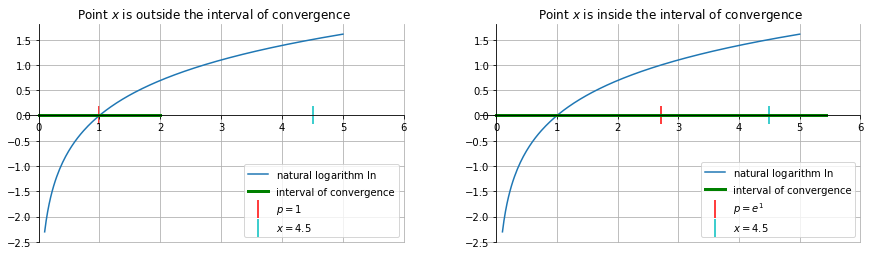

In [33]:
import matplotlib.pyplot as plt

x = np.linspace(0.1, 5,200)

ax = plt.subplots(figsize=(15, 4)) 

plt.subplot(1, 2, 1)

plt.plot(x, np.log(x), label='natural logarithm $\ln$')
plt.plot([2, 0], [0, 0], color = 'g', linewidth = 3, label = 'interval of convergence')
plt.scatter([1],[0], marker = '|', s = 300, color = 'r', label = '$p = 1$')
plt.scatter([4.5],[0], marker = '|', s = 300, color = 'c', label = '$x = 4.5$')

ax = plt.gca()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.grid(True, which='both')

plt.xticks(np.linspace(0,6,7))

plt.title('Point $x$ is outside the interval of convergence')
plt.legend(loc = 4)

plt.subplot(1, 2, 2)

plt.plot(x, np.log(x), label='natural logarithm $\ln$')
plt.plot([2*np.exp(1), 0], [0, 0], color = 'g', linewidth = 3, label = 'interval of convergence')
plt.scatter([np.exp(1)],[0], marker = '|', s = 300, color = 'r', label = '$p = e^1$')
plt.scatter([4.5],[0], marker = '|', s = 300, color = 'c', label = '$x = 4.5$')

ax = plt.gca()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.grid(True, which='both')

plt.xticks(np.linspace(0,6,7))

plt.title('Point $x$ is inside the interval of convergence')
plt.legend(loc = 4)

plt.show()

In [15]:
approxStepsMsg(4.5, 1, 0.0001, 100);

Starting from p = exp(1), we get that ln(4.5) = 1.50409449458 with an error less than 0.0001 and it was is done in 17 steps.


**Worst-case scenarios.** If $x$ is close to the boundry of the interval of convergence $(0,2p)$, then $\alpha$ is close to $1$ and thus the Taylor series converges very slowly. In fact, for $x=1.999$ and $p=e^0=1$ we need over $1000$ steps to get the approximation with an error less then $\varepsilon = 0.1$, which is quite poor.

In [36]:
approxStepsMsg(1.999, 0, 0.1, 1000);
approxStepsMsg(1.999, 0, 0.1, 10000);

Overflow! In order to compute ln(1.999) with an error less than 0.1 starting from p = exp(0) more than 1000 are required.
Starting from p = exp(0), we get that ln(1.999) = 0.692597018308 with an error less than 0.1 and it was is done in 1744 steps.


 A similar situation happens for a very small $x$.

In [37]:
approxStepsMsg(0.001, 0, 0.01, 1000);
approxStepsMsg(0.001, 0, 0.01, 10000);

Overflow! In order to compute ln(0.001) with an error less than 0.01 starting from p = exp(0) more than 1000 are required.
Starting from p = exp(0), we get that ln(0.001) = -6.89972756649 with an error less than 0.01 and it was is done in 3384 steps.


**Optimization.** From the previous examles, we see that for $x$ close 